In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import graphviz 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read best model pickle
with open('./data/best_sf.pickle', 'rb') as file:
    best_sf = pickle.load(file)
with open('./data/best_mf.pickle', 'rb') as file:
    best_mf = pickle.load(file)
with open('./data/best_cm.pickle', 'rb') as file:
    best_cm = pickle.load(file)
with open('./data/best_id.pickle', 'rb') as file:
    best_id = pickle.load(file)
with open('./data/best_mx.pickle', 'rb') as file:
    best_mx = pickle.load(file)
with open('./data/best_va.pickle', 'rb') as file:
    best_va = pickle.load(file)

In [3]:
# get training, validation and test data for single family
X_train_sf = pd.read_csv('./data/X_train_sf.csv')
X_train_sf.index = X_train_sf['Unnamed: 0']
X_train_sf = X_train_sf.drop(['Unnamed: 0'], axis=1)
X_val_sf = pd.read_csv('./data/X_val_sf.csv')
X_val_sf.index = X_val_sf['Unnamed: 0']
X_val_sf = X_val_sf.drop(['Unnamed: 0'], axis=1)
X_test_sf = pd.read_csv('./data/X_test_sf.csv')
X_test_sf.index = X_test_sf['Unnamed: 0']
X_test_sf = X_test_sf.drop(['Unnamed: 0'], axis=1)
y_train_sf = pd.read_csv('./data/y_train_sf.csv')
y_train_sf.index = y_train_sf['Unnamed: 0']
y_train_sf = y_train_sf.drop(['Unnamed: 0'], axis=1)
y_val_sf = pd.read_csv('./data/y_val_sf.csv')
y_val_sf.index = y_val_sf['Unnamed: 0']
y_val_sf = y_val_sf.drop(['Unnamed: 0'], axis=1)
y_test_sf = pd.read_csv('./data/y_test_sf.csv')
y_test_sf.index = y_test_sf['Unnamed: 0']
y_test_sf = y_test_sf.drop(['Unnamed: 0'], axis=1)

y_train_plus_val_sf = pd.concat([y_train_sf, y_val_sf])
X_train_plus_val_sf = pd.concat([X_train_sf, X_val_sf])

In [4]:
# MULTIFAMILY get training, validation and test data
X_train_mf = pd.read_csv('./data/X_train_mf.csv')
X_train_mf.index = X_train_mf['Unnamed: 0']
X_train_mf = X_train_mf.drop(['Unnamed: 0'], axis=1)

X_val_mf = pd.read_csv('./data/X_val_mf.csv')
X_val_mf.index = X_val_mf['Unnamed: 0']
X_val_mf = X_val_mf.drop(['Unnamed: 0'], axis=1)

X_test_mf = pd.read_csv('./data/X_test_mf.csv')
X_test_mf.index = X_test_mf['Unnamed: 0']
X_test_mf = X_test_mf.drop(['Unnamed: 0'], axis=1)

y_train_mf = pd.read_csv('./data/y_train_mf.csv')
y_train_mf.index = y_train_mf['Unnamed: 0']
y_train_mf = y_train_mf.drop(['Unnamed: 0'], axis=1)

y_val_mf = pd.read_csv('./data/y_val_mf.csv')
y_val_mf.index = y_val_mf['Unnamed: 0']
y_val_mf = y_val_mf.drop(['Unnamed: 0'], axis=1)

y_test_mf = pd.read_csv('./data/y_test_mf.csv')
y_test_mf.index = y_test_mf['Unnamed: 0']
y_test_mf = y_test_mf.drop(['Unnamed: 0'], axis=1)

y_train_plus_val_mf = pd.concat([y_train_mf, y_val_mf])
X_train_plus_val_mf = pd.concat([X_train_mf, X_val_mf])

In [5]:
# Commercial-- training, validation and test data
X_train_cm = pd.read_csv('./data/X_train_cm.csv')
X_train_cm.index = X_train_cm['Unnamed: 0']
X_train_cm = X_train_cm.drop(['Unnamed: 0'], axis=1)

X_val_cm = pd.read_csv('./data/X_val_cm.csv')
X_val_cm.index = X_val_cm['Unnamed: 0']
X_val_cm = X_val_cm.drop(['Unnamed: 0'], axis=1)

X_test_cm = pd.read_csv('./data/X_test_cm.csv')
X_test_cm.index = X_test_cm['Unnamed: 0']
X_test_cm = X_test_cm.drop(['Unnamed: 0'], axis=1)

y_train_cm = pd.read_csv('./data/y_train_cm.csv')
y_train_cm.index = y_train_cm['Unnamed: 0']
y_train_cm = y_train_cm.drop(['Unnamed: 0'], axis=1)

y_val_cm = pd.read_csv('./data/y_val_cm.csv')
y_val_cm.index = y_val_cm['Unnamed: 0']
y_val_cm = y_val_cm.drop(['Unnamed: 0'], axis=1)

y_test_cm = pd.read_csv('./data/y_test_cm.csv')
y_test_cm.index = y_test_cm['Unnamed: 0']
y_test_cm = y_test_cm.drop(['Unnamed: 0'], axis=1)

y_train_plus_val_cm = pd.concat([y_train_cm, y_val_cm])
X_train_plus_val_cm = pd.concat([X_train_cm, X_val_cm])

In [6]:
#INDUSTRIAL get training, validation and test data
X_train_id = pd.read_csv('./data/X_train_id.csv')
X_train_id.index = X_train_id['Unnamed: 0']
X_train_id = X_train_id.drop(['Unnamed: 0'], axis=1)

X_val_id = pd.read_csv('./data/X_val_id.csv')
X_val_id.index = X_val_id['Unnamed: 0']
X_val_id = X_val_id.drop(['Unnamed: 0'], axis=1)

X_test_id = pd.read_csv('./data/X_test_id.csv')
X_test_id.index = X_test_id['Unnamed: 0']
X_test_id = X_test_id.drop(['Unnamed: 0'], axis=1)

y_train_id = pd.read_csv('./data/y_train_id.csv')
y_train_id.index = y_train_id['Unnamed: 0']
y_train_id = y_train_id.drop(['Unnamed: 0'], axis=1)

y_val_id = pd.read_csv('./data/y_val_id.csv')
y_val_id.index = y_val_id['Unnamed: 0']
y_val_id = y_val_id.drop(['Unnamed: 0'], axis=1)

y_test_id = pd.read_csv('./data/y_test_id.csv')
y_test_id.index = y_test_id['Unnamed: 0']
y_test_id = y_test_id.drop(['Unnamed: 0'], axis=1)

y_train_plus_val_id = pd.concat([y_train_id, y_val_id])
X_train_plus_val_id = pd.concat([X_train_id, X_val_id])

In [7]:
# get training, validation and test data for mixed use
X_train_mx = pd.read_csv('./data/X_train_mx.csv')
X_train_mx.index = X_train_mx['Unnamed: 0']
X_train_mx = X_train_mx.drop(['Unnamed: 0'], axis=1)
X_val_mx = pd.read_csv('./data/X_val_mx.csv')
X_val_mx.index = X_val_mx['Unnamed: 0']
X_val_mx = X_val_mx.drop(['Unnamed: 0'], axis=1)
X_test_mx = pd.read_csv('./data/X_test_mx.csv')
X_test_mx.index = X_test_mx['Unnamed: 0']
X_test_mx = X_test_mx.drop(['Unnamed: 0'], axis=1)
y_train_mx = pd.read_csv('./data/y_train_mx.csv')
y_train_mx.index = y_train_mx['Unnamed: 0']
y_train_mx = y_train_mx.drop(['Unnamed: 0'], axis=1)
y_val_mx = pd.read_csv('./data/y_val_mx.csv')
y_val_mx.index = y_val_mx['Unnamed: 0']
y_val_mx = y_val_mx.drop(['Unnamed: 0'], axis=1)
y_test_mx = pd.read_csv('./data/y_test_mx.csv')
y_test_mx.index = y_test_mx['Unnamed: 0']
y_test_mx = y_test_mx.drop(['Unnamed: 0'], axis=1)

X_train_plus_val_mx = pd.concat([X_train_mx, X_val_mx])
y_train_plus_val_mx = pd.concat([y_train_mx, y_val_mx])

In [8]:
# vacant-- training, validation and test data
X_train_va = pd.read_csv('./data/X_train_va.csv')
X_train_va.index = X_train_va['Unnamed: 0']
X_train_va = X_train_va.drop(['Unnamed: 0'], axis=1)

X_val_va = pd.read_csv('./data/X_val_va.csv')
X_val_va.index = X_val_va['Unnamed: 0']
X_val_va = X_val_va.drop(['Unnamed: 0'], axis=1)

X_test_va = pd.read_csv('./data/X_test_va.csv')
X_test_va.index = X_test_va['Unnamed: 0']
X_test_va = X_test_va.drop(['Unnamed: 0'], axis=1)

y_train_va = pd.read_csv('./data/y_train_va.csv')
y_train_va.index = y_train_va['Unnamed: 0']
y_train_va = y_train_va.drop(['Unnamed: 0'], axis=1)

y_val_va = pd.read_csv('./data/y_val_va.csv')
y_val_va.index = y_val_va['Unnamed: 0']
y_val_va = y_val_va.drop(['Unnamed: 0'], axis=1)

y_test_va = pd.read_csv('./data/y_test_va.csv')
y_test_va.index = y_test_va['Unnamed: 0']
y_test_va = y_test_va.drop(['Unnamed: 0'], axis=1)

y_train_plus_val_va = pd.concat([y_train_va, y_val_va])
X_train_plus_val_va = pd.concat([X_train_va, X_val_va])

### Histogram for Result Comparision

In [9]:
sns.set()

In [10]:
X_test_id.shape

(128, 74)

In [11]:
best_id

RandomForestRegressor(min_samples_leaf=5, n_estimators=800)

In [12]:
y_test_id.shape

(128, 1)

Text(0.5, 1.0, 'Vacant Land Sale Price Prediction')

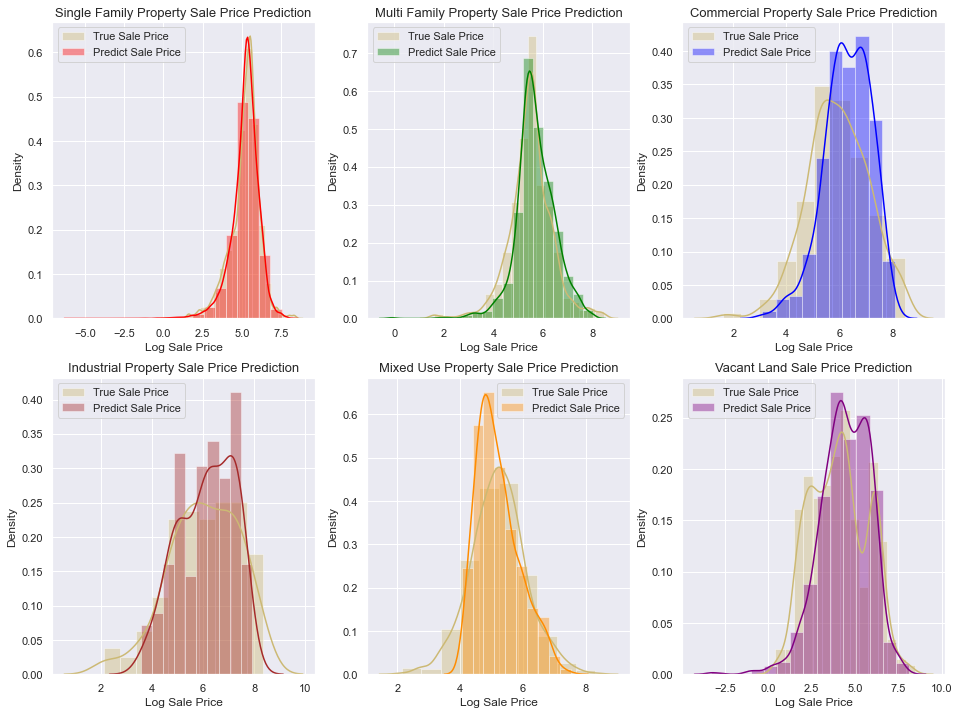

In [13]:
# plot graphs showing true sale prices and predicted sale prices
fig,axs = plt.subplots(2,3,figsize=(16,12))
sns.distplot(np.log(y_test_sf), bins=20, kde=True, color = 'y', ax=axs[0,0], label='True Sale Price')
sns.distplot(np.log(best_sf.predict(X_test_sf)), bins=20, kde=True, color = 'red', ax=axs[0,0], label='Predict Sale Price')
sns.distplot(np.log(y_test_mf), bins=20, kde=True, color = 'y', ax=axs[0,1], label='True Sale Price')
sns.distplot(np.log(best_mf.predict(X_test_mf)), bins=20, kde=True, color = 'green', ax=axs[0,1], label='Predict Sale Price')
sns.distplot(np.log(y_test_cm), bins=10, kde=True, color = 'y', ax=axs[0,2], label='True Sale Price')
sns.distplot(np.log(best_cm.predict(X_test_cm)), bins=10, kde=True, color = 'blue', ax=axs[0,2], label='Predict Sale Price')
sns.distplot(np.log(y_test_id), bins=10, kde=True, color = 'y', ax=axs[1,0], label='True Sale Price')
sns.distplot(np.log(best_id.predict(X_test_id)), bins=10, kde=True, color = 'brown', ax=axs[1,0], label='Predict Sale Price')
sns.distplot(np.log(y_test_mx), bins=10, kde=True, color = 'y', ax=axs[1,1], label='True Sale Price')
sns.distplot(np.log(best_mx.predict(X_test_mx)), bins=10, kde=True, color = 'darkorange', ax=axs[1,1], label='Predict Sale Price')
sns.distplot(np.log(y_test_va), bins=15, kde=True, color = 'y', ax=axs[1,2], label='True Sale Price')
sns.distplot(np.log(best_va.predict(X_test_va)), bins=15, kde=True, color = 'purple', ax=axs[1,2], label='Predict Sale Price')

axs[0,0].legend()
axs[0,1].legend()
axs[0,2].legend()
axs[1,0].legend()
axs[1,1].legend()
axs[1,2].legend()

axs[0,0].set_xlabel('Log Sale Price')
axs[0,1].set_xlabel('Log Sale Price')
axs[0,2].set_xlabel('Log Sale Price')
axs[1,0].set_xlabel('Log Sale Price')
axs[1,1].set_xlabel('Log Sale Price')
axs[1,2].set_xlabel('Log Sale Price')

axs[0,0].set_title('Single Family Property Sale Price Prediction', fontsize=13)
axs[0,1].set_title('Multi Family Property Sale Price Prediction', fontsize=13)
axs[0,2].set_title('Commercial Property Sale Price Prediction', fontsize=13)
axs[1,0].set_title('Industrial Property Sale Price Prediction', fontsize=13)
axs[1,1].set_title('Mixed Use Property Sale Price Prediction', fontsize=13)
axs[1,2].set_title('Vacant Land Sale Price Prediction', fontsize=13)

### Feature Importance for Best model (6 property types)

In [14]:
def calc_feature_importances(model,feat_names,num_to_show,titles):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    sns.set()
#     plt.rcParams.update({'font.size': 24}) 
    ax = RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,fontsize=20)
    ax.set_title(titles, fontsize=25)

    plt.show()
    
    
    return RF_ranking

[12:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Feat Index,Feature,Importance
0,75,zip_code,0.105341
1,33,site_type_G,0.079922
2,10,exterior_condition_rehabbed,0.056871
3,69,number_of_bathrooms,0.050746
4,74,total_livable_area,0.045685
5,68,geographic_ward,0.043706
6,0,basements_None,0.040325
7,58,view_type_C,0.039002
8,34,street_designation_AVE,0.027368
9,22,interior_condition_average,0.025140


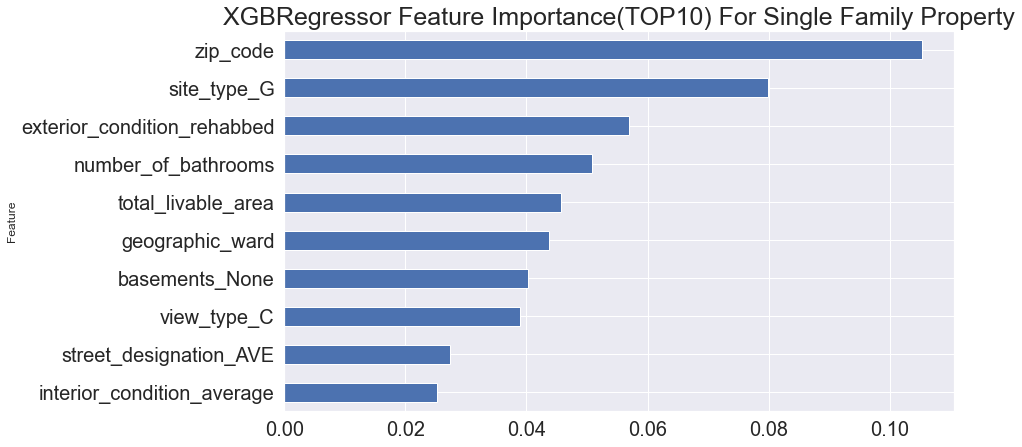

In [15]:
top_features = 10
# ranking = calc_feature_importances(xg_cv_cm.best_estimator_,X_train_cm.columns,top_features)

# 1. sf model 
title_sf = 'XGBRegressor Feature Importance(TOP10) For Single Family Property'
best_sf.fit(X_train_plus_val_sf,y_train_plus_val_sf)
ranking_sf = calc_feature_importances(best_sf,X_train_plus_val_sf.columns,top_features,title_sf)

[12:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Feat Index,Feature,Importance
0,70,total_livable_area,0.078546
1,6,exterior_condition_average,0.076577
2,2,basements_partial,0.063978
3,20,interior_condition_average,0.042423
4,74,sale_year,0.038962
5,24,interior_condition_sealed,0.033222
6,73,lng,0.031142
7,71,zip_code,0.030165
8,78,age,0.029389
9,68,number_stories,0.028571


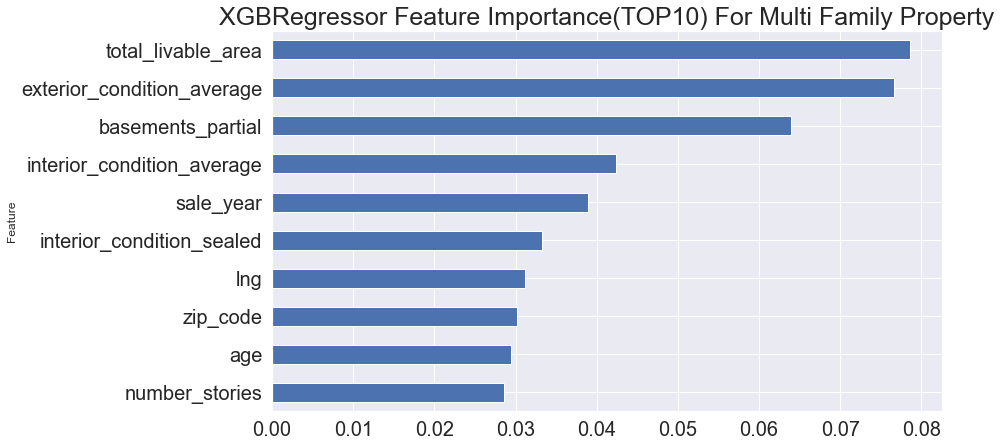

In [16]:
# 2. mf model 
title_mf = 'XGBRegressor Feature Importance(TOP10) For Multi Family Property'
best_mf.fit(X_train_plus_val_mf,y_train_plus_val_mf)
ranking_mf = calc_feature_importances(best_mf,X_train_plus_val_mf.columns,top_features,title_mf)

[12:33:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Feat Index,Feature,Importance
0,14,garage_type_builtin,0.126238
1,54,view_type_A,0.094540
2,21,interior_condition_above average,0.080785
3,17,garage_type_none,0.060396
4,72,total_livable_area,0.045123
5,73,zip_code,0.041313
6,70,number_stories,0.033893
7,24,interior_condition_new,0.033043
8,71,total_area,0.030049
9,37,street_designation_LA,0.023480


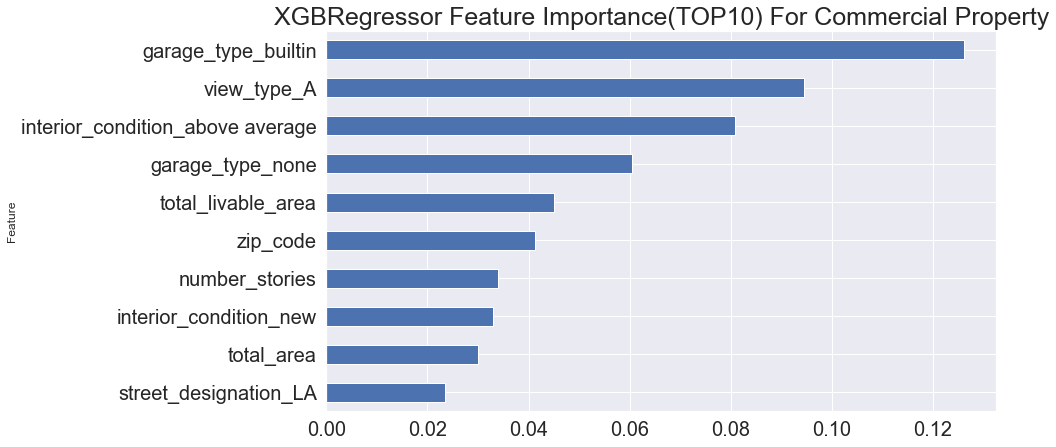

In [17]:
# 3. cm model 
title_cm = 'XGBRegressor Feature Importance(TOP10) For Commercial Property'
best_cm.fit(X_train_plus_val_cm,y_train_plus_val_cm)
ranking_cm = calc_feature_importances(best_cm,X_train_plus_val_cm.columns,top_features,title_cm)

,Feat Index,Feature,Importance
0,61,total_area,0.435959
1,65,lng,0.125876
2,62,total_livable_area,0.102895
3,64,lat,0.062140
4,66,sale_year,0.052160
5,54,frontage,0.042002
6,52,depth,0.034299
7,70,age,0.027501
8,63,zip_code,0.027299
9,73,livable_area_ratio,0.020364


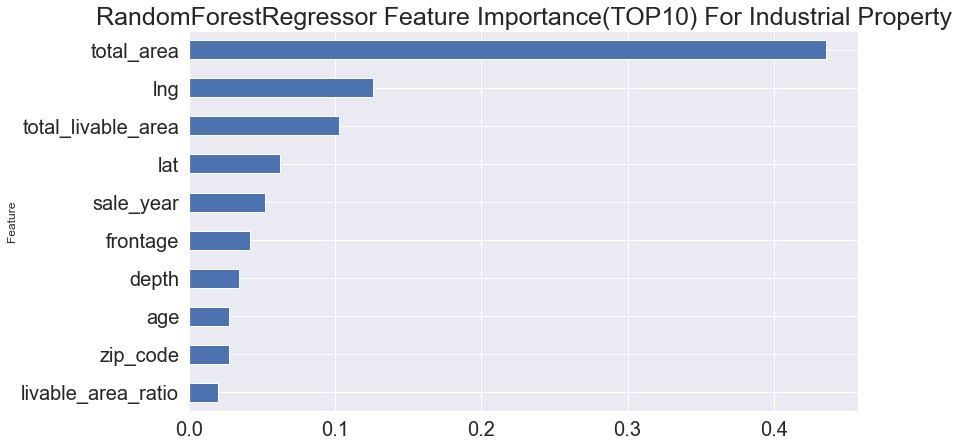

In [18]:
# 4. Industrial model 
title_id = 'RandomForestRegressor Feature Importance(TOP10) For Industrial Property'
best_id.fit(X_train_plus_val_id,y_train_plus_val_id)
ranking_id = calc_feature_importances(best_id,X_train_plus_val_id.columns,top_features,title_id)

,Feat Index,Feature,Importance
0,69,zip_code,0.216771
1,71,lng,0.183363
2,68,total_livable_area,0.146987
3,70,lat,0.092550
4,62,geographic_ward,0.085779
5,72,sale_year,0.056892
6,66,number_stories,0.040536
7,67,total_area,0.026064
8,76,age,0.022352
9,79,livable_area_ratio,0.018851


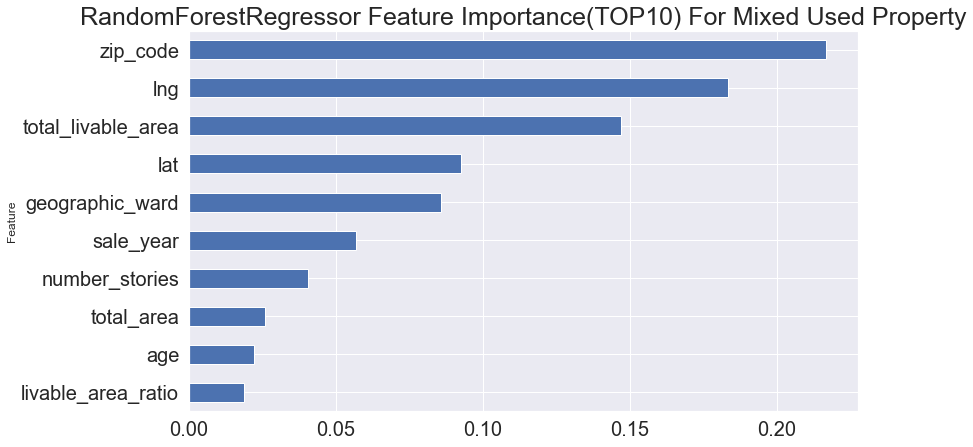

In [19]:
# 5. Mixed Used model 
title_mx = 'RandomForestRegressor Feature Importance(TOP10) For Mixed Used Property'
best_mx.fit(X_train_plus_val_mx,y_train_plus_val_mx)
ranking_mx = calc_feature_importances(best_mx,X_train_plus_val_mx.columns,top_features,title_mx)

[12:33:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rate_init" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Feat Index,Feature,Importance
0,49,view_type_None,0.219343
1,26,street_designation_BLV,0.098110
2,48,view_type_I,0.069792
3,61,zip_code,0.067374
4,54,geographic_ward,0.047864
5,24,site_type_E,0.044318
6,52,frontage,0.039319
7,31,street_designation_RD,0.037409
8,7,exterior_condition_new,0.034115
9,63,lng,0.031119


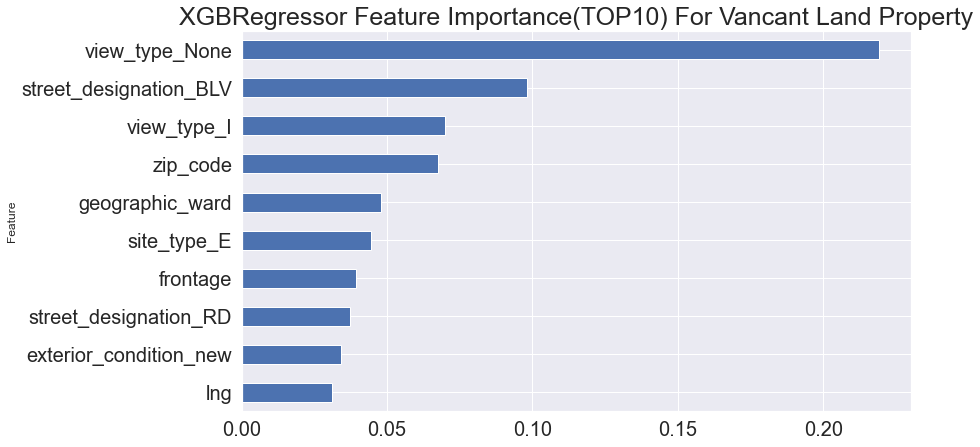

In [20]:
# 6. Vancant Land model 
title_va = 'XGBRegressor Feature Importance(TOP10) For Vancant Land Property'
best_va.fit(X_train_plus_val_va,y_train_plus_val_va)
ranking_va = calc_feature_importances(best_va,X_train_plus_val_va.columns,top_features,title_va)